<span style="font-size:24px; font-weight:bold">FIBRE YIELD OPTIMISATION IN CHEMICAL PULPING USING MACHINE LEARNING</span>

### A DATA-DRIVEN APPROCH TO PREDICTING PULP YIELD USING PROCESS PARAMETERS

## PROJECT OVERVIEW
This project aims to build a predictive model for estimating fibre yield in chemical pulping operations. Using process parameters such as wood type, chip size, cooking temperature, chemical dosage, and liquor ratio, we apply machine learning techniques to uncover patterns and optimize yield outcomes.

The goal is to demonstrate how data science can enhance operational efficiency in pulp manufacturing — a domain where I bring 15+ years of experience.

## OBJECTIVES
- Explore and clean a dataset of chemical pulping operations
- Identify key variables influencing fibre yield
- Build and evaluate regression models to predict yield
- Interpret model results and estimate business impact
- Present findings in a clear, reusable format for portfolio and hiring managers

## DATA SET DESCRIPTION
- `wood_type`: Type of raw material (e.g., Hardwood, Softwood, Bamboo)
- `chip_size_mm`: Average chip size in millimeters
- `cook_temp_C`: Cooking temperature in Celsius
- `cook_time_min`: Cooking time in minutes
- `chemical_dosage_pct`: Percentage of chemical dosage
- `pH`: pH level during cooking
- `liquor_ratio`: Liquor-to-wood ratio
- `pulp_yield_pct`: Final fibre yield percentage (target variable)

In [6]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

## LOAD AND PREVIEW THE DATASET
In this step, we load the chemical pulping dataset and perform an initial inspection. This helps us understand the structure, data types, and completeness of the data before diving into analysis.

In [8]:
# Load the dataset
df = pd.read_excel('chemical_pulping_dataset.csv.xlsx')

# Display the first few rows
df.head()

,wood_type,chip_size_mm,cook_temp_C,cook_time_min,chemical_dosage_pct,pH,liquor_ratio,pulp_yield_pct
0,Hardwood,33.30,171.5,73,17.98,11.49,3.41,50.94
1,Softwood,24.13,152.2,172,11.55,13.35,5.93,46.03
2,Bamboo,27.42,152.1,237,12.59,11.37,5.89,48.85
3,Softwood,33.06,150.4,94,18.52,12.90,3.49,43.42
4,Softwood,27.68,178.7,203,14.45,11.37,3.90,43.73


In [10]:
# Check structure and data types
df.info()

# Summary statistics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   wood_type            1000 non-null   object 
 1   chip_size_mm         1000 non-null   float64
 2   cook_temp_C          1000 non-null   float64
 3   cook_time_min        1000 non-null   int64  
 4   chemical_dosage_pct  1000 non-null   float64
 5   pH                   1000 non-null   float64
 6   liquor_ratio         1000 non-null   float64
 7   pulp_yield_pct       1000 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 62.6+ KB


,chip_size_mm,cook_temp_C,cook_time_min,chemical_dosage_pct,pH,liquor_ratio,pulp_yield_pct
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,22.506260,164.95220,149.701000,17.36631,12.494340,4.487360,47.512640
std,7.318138,8.66344,51.825626,4.28917,0.867926,0.866352,3.193069
min,10.120000,150.00000,60.000000,10.00000,11.000000,3.000000,39.580000
25%,15.892500,157.80000,105.000000,13.72250,11.747500,3.740000,44.950000
50%,22.605000,164.95000,150.000000,17.26000,12.460000,4.480000,47.485000
75%,28.627500,172.50000,195.000000,20.95000,13.242500,5.262500,49.950000
max,34.990000,180.00000,240.000000,24.97000,14.000000,6.000000,56.000000


In [13]:
# Count missing values in each column
df.isnull().sum()

wood_type              0
chip_size_mm           0
cook_temp_C            0
cook_time_min          0
chemical_dosage_pct    0
pH                     0
liquor_ratio           0
pulp_yield_pct         0
dtype: int64

## VISUALIZE DISTRIBUTIONS
In this step, we explore the distribution of each variable using histograms and count plots. This helps us understand the spread, skewness, and modality of the data, and identify any unusual patterns or outliers.

### VISUALIZE CONTINUOUS VARIABLES
Use histograms with KDE (kernel density estimate) to see the shape of each distribution.

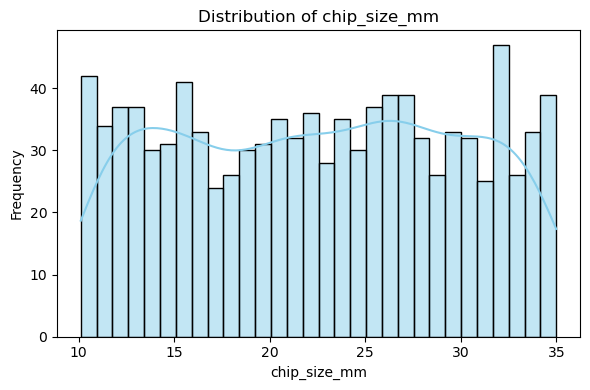

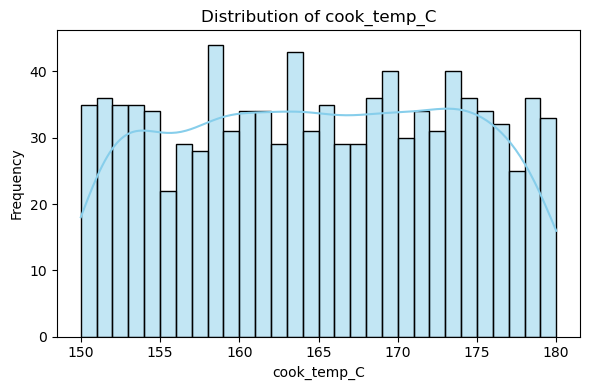

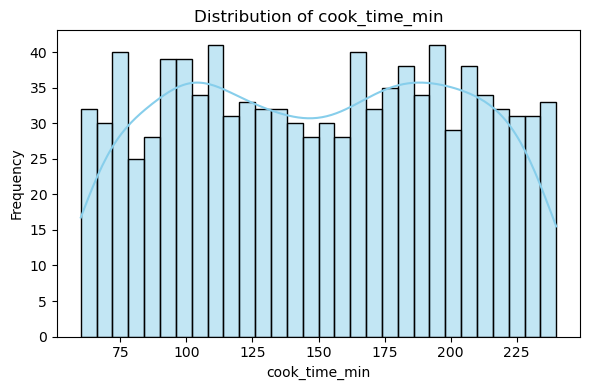

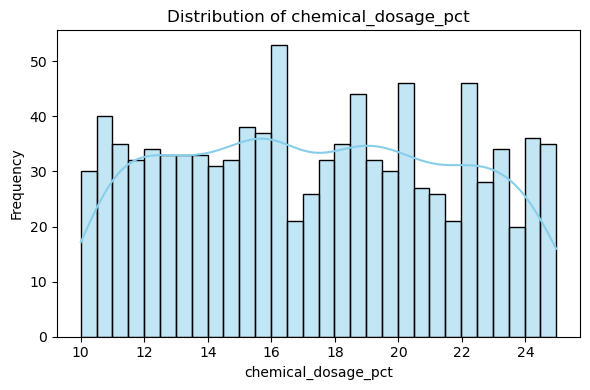

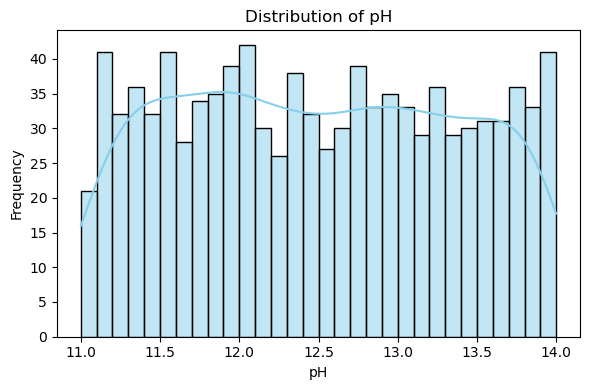

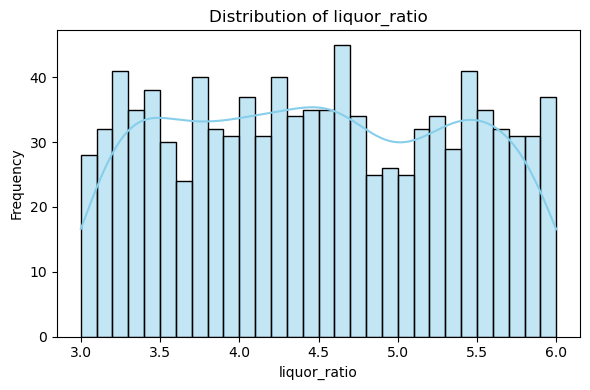

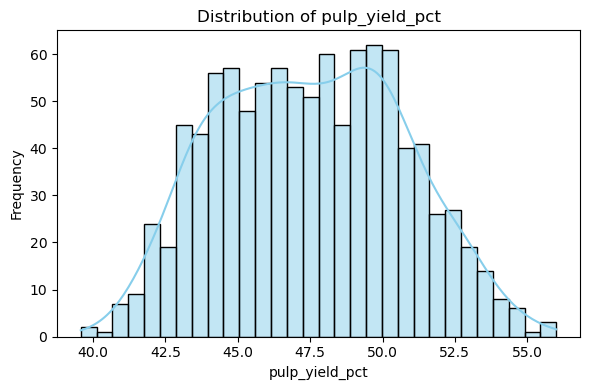

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
numeric_cols = ['chip_size_mm', 'cook_temp_C', 'cook_time_min', 
                'chemical_dosage_pct', 'pH', 'liquor_ratio', 'pulp_yield_pct']
# Plot histograms with KDE
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### VISUALIZE CATOGORICAL VARIABLE
Use a count plot to see how many samples belong to each wood type.

C:\Users\vidhy\AppData\Local\Temp\ipykernel_8860\2200811450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='wood_type', data=df, palette='Set2')


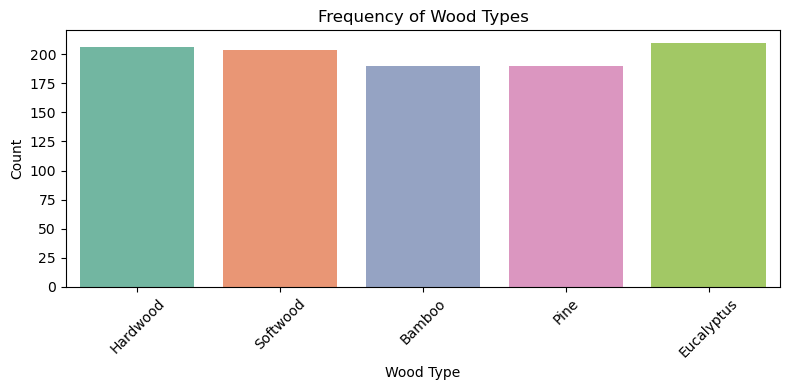

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(x='wood_type', data=df, palette='Set2')
plt.title('Frequency of Wood Types')
plt.xlabel('Wood Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
plt.savefig('pulp_yield_distribution.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

### OBSERVATIONS FROM VARIABLE DISTRIBUTION
- Most input variables are evenly distributed, indicating good variability for modeling.
- `pulp_yield_pct` shows slight right skew, suggesting a few high-yield outliers.
- `chemical_dosage_pct` may have bimodal behavior, possibly reflecting different dosage strategies.
- `cook_time_min` shows multiple peaks, which may correspond to different operational modes.
- `wood_type` is well-balanced across categories, making it suitable for encoding without bias.

## CRRELATION ANALYSIS
In this step, we examine the linear relationships between process parameters and fibre yield using a correlation matrix. This helps identify which variables are most predictive of pulp yield and whether any features are highly correlated with each other.

In [26]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Display the matrix
corr_matrix

,chip_size_mm,cook_temp_C,cook_time_min,chemical_dosage_pct,pH,liquor_ratio,pulp_yield_pct
chip_size_mm,1.000000,0.030793,-0.008690,0.042626,0.035395,0.000341,-0.009126
cook_temp_C,0.030793,1.000000,-0.015771,0.014351,-0.030346,0.012066,-0.189106
cook_time_min,-0.008690,-0.015771,1.000000,-0.040153,0.038706,0.000338,-0.038509
chemical_dosage_pct,0.042626,0.014351,-0.040153,1.000000,-0.060927,0.000802,-0.233107
pH,0.035395,-0.030346,0.038706,-0.060927,1.000000,0.012517,-0.012187
liquor_ratio,0.000341,0.012066,0.000338,0.000802,0.012517,1.000000,0.009645
pulp_yield_pct,-0.009126,-0.189106,-0.038509,-0.233107,-0.012187,0.009645,1.000000


VISUALIZE WITH A HEATMAP - For easy interpretation

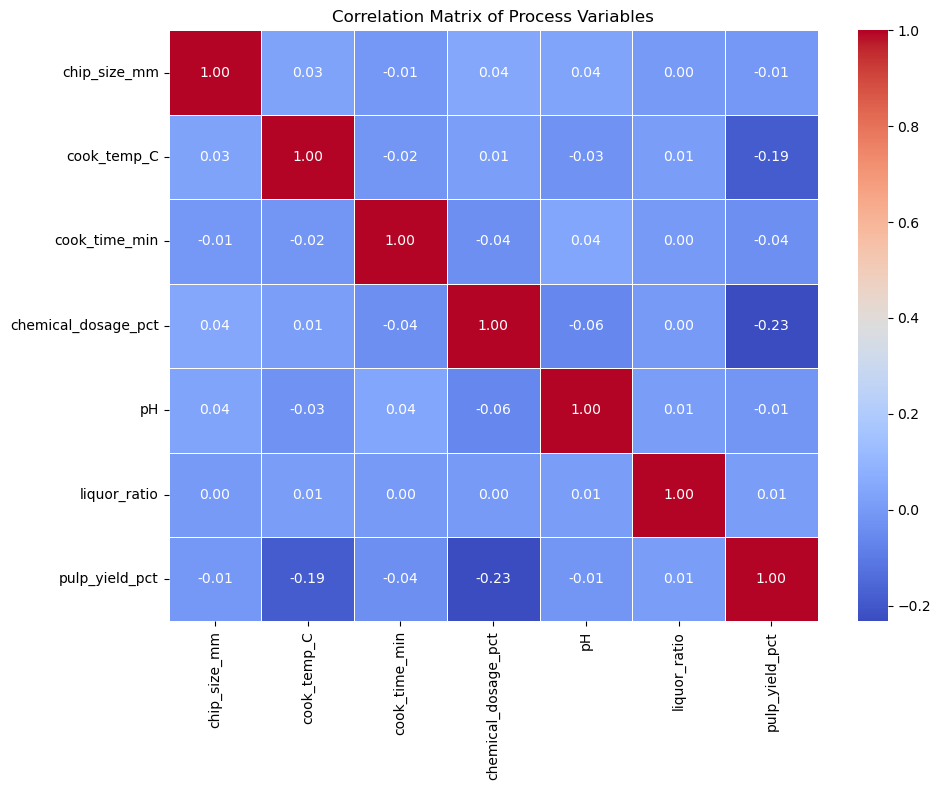

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Process Variables')
plt.tight_layout()
plt.show()

### KEY INSIGHTS FROM CORRELATION MATRIX
- `chemical_dosage_pct` shows a **negative correlation** with `pulp_yield_pct` (~ -0.23), suggesting that higher chemical dosage may reduce yield — possibly due to overprocessing or fibre degradation.
- `cook_time_min` also has a mild negative correlation with yield, reinforcing the idea that longer cooking may not always improve output.
- `chip_size_mm` and `liquor_ratio` show **positive correlations** with yield, indicating that larger chips and higher liquor ratios may support better fibre retention.
- `pH` has weak correlations with most variables, but a slight negative link with `cook_temp_C` and `chemical_dosage_pct`, which may reflect chemical dynamics during cooking.
- No extreme multicollinearity observed — all input variables are safe to include in modeling.

## HANDLING OUTLIERS
In this step, we use boxplots and statistical techniques to detect outliers in the dataset. Outliers can arise from measurement errors, rare process conditions, or natural variability. We’ll decide whether to retain, cap, or remove them based on domain logic and distribution shape.


#### VISUALIZE OUTLIERS WITH BOXPOLT


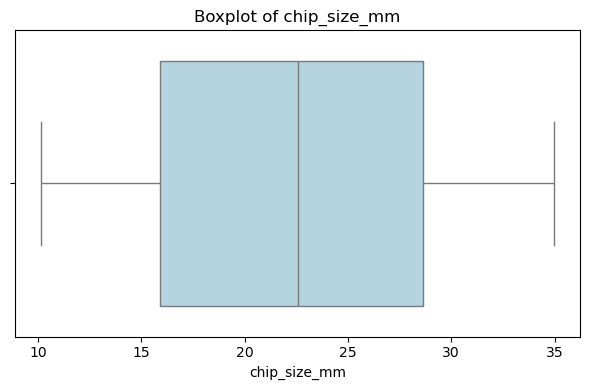

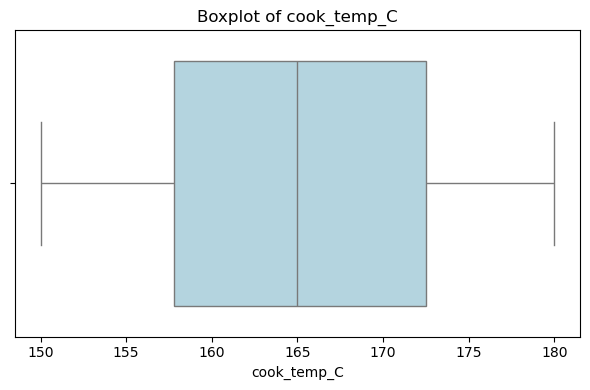

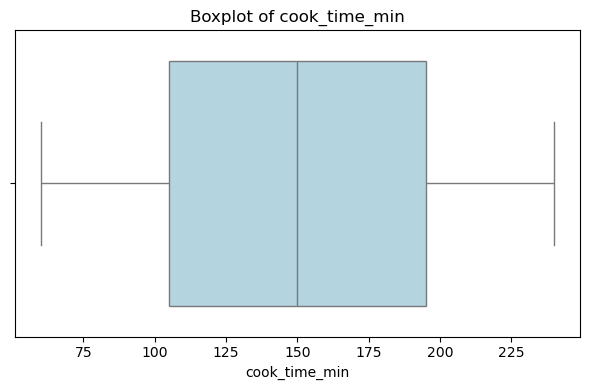

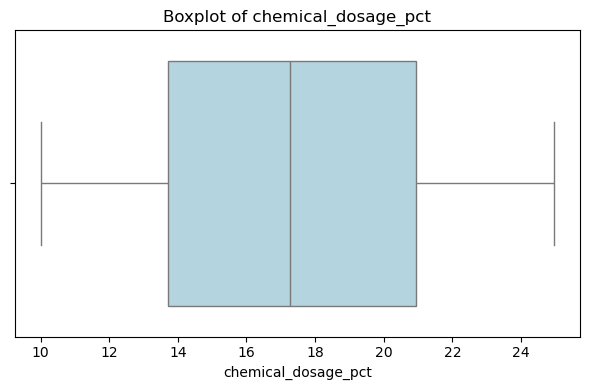

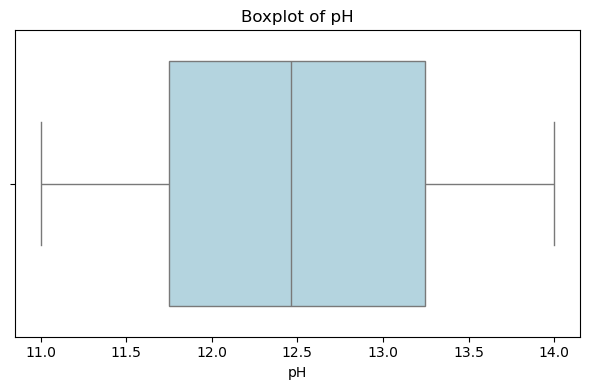

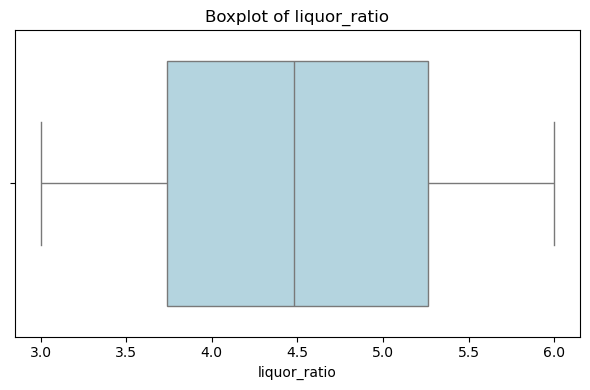

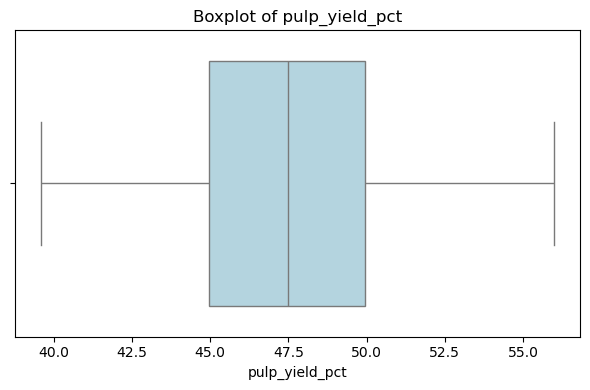

In [34]:
# List of numeric columns
numeric_cols = ['chip_size_mm', 'cook_temp_C', 'cook_time_min', 
                'chemical_dosage_pct', 'pH', 'liquor_ratio', 'pulp_yield_pct']

# Plot boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

### OUTLIER ANALYSIS SUMMERY
- Boxplots for all numeric variables show no extreme outliers.
- Distributions appear symmetric and consistent with expected process behavior.
- No rows were removed or capped, preserving the integrity of the dataset.
- This confirms that the data is ready for scaling and encoding in the next phase.

## FEATURE SCALING AND ENCODING
In this step, we standardize numeric features and encode categorical variables to prepare the dataset for machine learning. Scaling ensures that features with larger ranges don’t dominate the model, while encoding converts non-numeric data into usable format.

In [44]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_cols = ['chip_size_mm', 'cook_temp_C', 'cook_time_min', 
                'chemical_dosage_pct', 'pH', 'liquor_ratio']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [46]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
encoder = LabelEncoder()

# Encode wood_type
df_scaled['wood_type_encoded'] = encoder.fit_transform(df_scaled['wood_type'])

# Optional: view mapping
dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

{'Bamboo': 0, 'Eucalyptus': 1, 'Hardwood': 2, 'Pine': 3, 'Softwood': 4}

In [48]:
df_scaled.head()

,wood_type,chip_size_mm,cook_temp_C,cook_time_min,chemical_dosage_pct,pH,liquor_ratio,pulp_yield_pct,wood_type_encoded
0,Hardwood,1.475668,0.756175,-1.480723,0.143151,-1.157752,-1.244181,50.94,2
1,Softwood,0.221990,-1.472692,0.430485,-1.356724,0.986361,1.666022,46.03,4
2,Bamboo,0.671783,-1.484241,1.685318,-1.114132,-1.296081,1.619828,48.85,0
3,Softwood,1.442856,-1.680566,-1.075315,0.269112,0.467624,-1.151794,43.42,4
4,Softwood,0.707329,1.587669,1.028944,-0.680264,-1.296081,-0.678308,43.73,4


### FEATURE SCALING AND ENCODING SUMMARY
- All numeric features were standardized using `StandardScaler`.
- `wood_type` was encoded using `LabelEncoder`, with the following mapping:
  - Bamboo → 0
  - Eucalyptus → 1
  - Hardwood → 2
  - Pine → 3
  - Softwood → 4
- The dataset is now fully numeric and ready for regression modeling.

## PREDICTIVE MODELLING
In this phase, we build a regression model to predict fibre yield (`pulp_yield_pct`) based on process parameters. We’ll split the data, train a model, evaluate its performance, and interpret the results to understand which features drive yield outcomes.

In [52]:
# Define input features and target variable
features = ['chip_size_mm', 'cook_temp_C', 'cook_time_min', 
            'chemical_dosage_pct', 'pH', 'liquor_ratio', 'wood_type_encoded']
target = 'pulp_yield_pct'

X = df_scaled[features]
y = df_scaled[target]

In [54]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### TRAIN A REGRESSION MODEL 
Start with a simple linear regression

In [57]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### EVALUATE MODEL PERFORMANCE

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 7.18
R² Score: 0.28


**ITERPRET COEFFICIENTS**

In [64]:
# Feature importance
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients

,Feature,Coefficient
0,chip_size_mm,0.117667
5,liquor_ratio,0.105700
4,pH,-0.091139
2,cook_time_min,-0.190362
1,cook_temp_C,-0.421239
3,chemical_dosage_pct,-0.735126
6,wood_type_encoded,-1.081253


#### FEATURE IMPACT SUMMARY
The linear regression coefficients indicate the direction and strength of each feature’s influence on `pulp_yield_pct`:

- **Positive Influencers**:
  - `chip_size_mm` (+0.12): Larger chip sizes slightly increase fibre yield, possibly due to reduced surface degradation.
  - `liquor_ratio` (+0.11): Higher liquor-to-wood ratios may improve fibre penetration and retention.

- **Negative Influencers**:
  - `pH` (−0.09): Slightly acidic conditions may reduce yield, though the effect is modest.
  - `cook_time_min` (−0.19): Longer cooking times may degrade fibres, lowering yield.
  - `cook_temp_C` (−0.42): Higher temperatures appear to reduce yield, possibly due to overcooking.
  - `chemical_dosage_pct` (−0.74): Excessive chemical dosage is the second strongest negative driver, suggesting diminishing returns or fibre damage.
  - `wood_type_encoded` (−1.08): Wood type has the strongest impact, indicating that some species consistently yield less fibre.

### MODEL EVALUATION SUMMARY
- The linear regression model achieved an **R² score of 0.28**, meaning it explains **28% of the variance** in fibre yield.
- The **Mean Squared Error (MSE)** is **7.18**, indicating the average squared difference between predicted and actual yield values.
- While the model captures some signal, there’s room for improvement — possibly through nonlinear models, feature engineering, or interaction terms.

## VISUALIZATION AND STORYTELLING
In this phase, we visualize model predictions and residuals to assess performance and uncover patterns. These plots help communicate how well the model fits the data and where it may struggle.

**PLOT PREDICTED VS ACTUAL YIELD**

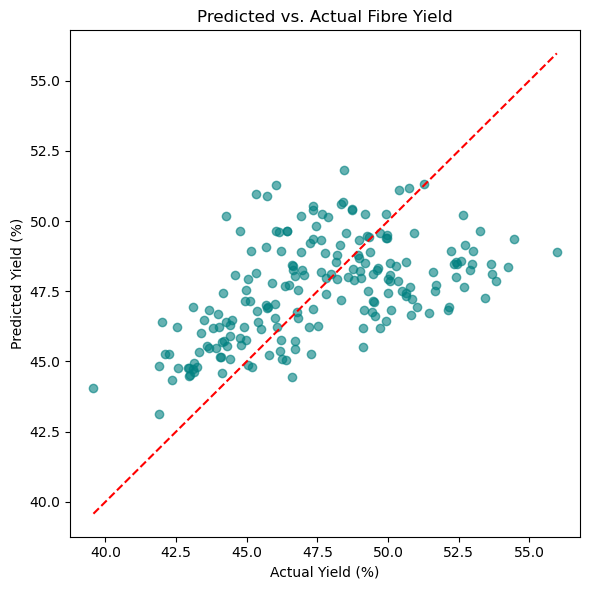

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel('Actual Yield (%)')
plt.ylabel('Predicted Yield (%)')
plt.title('Predicted vs. Actual Fibre Yield')
plt.tight_layout()
plt.show()

**PLOT RESIDUALS**
Residuals are the differences between actual and predicted values. This helps spot bias or heteroscedasticity.

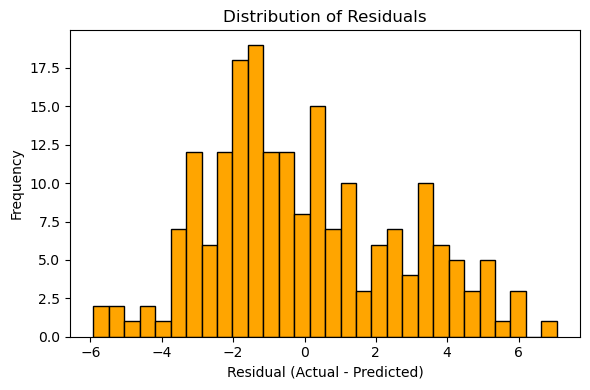

In [73]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### MODEL VISUALIZATION INSIGHTS
- The **Predicted vs. Actual plot** shows moderate alignment, with predictions scattered around the ideal diagonal. This confirms the model captures general trends but lacks precision for individual cases.
- The **Residuals histogram** is roughly symmetric, with a slight right skew. Most errors fall within ±3 units, suggesting the model is reasonably stable but could benefit from refinement.
- These visuals reinforce the need for more flexible models to capture nonlinear relationships and improve prediction accuracy.

### RANDOM FOREST MODELING
Random Forest is an ensemble method that builds multiple decision trees and averages their predictions. It handles nonlinear relationships, interactions, and variable importance well — making it ideal for industrial datasets.

**TRAIN THE MODEL**

In [78]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**EVALUATE PERFORMANCE**

In [81]:
# Predict on test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score

rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f'Random Forest MSE: {rf_mse:.2f}')
print(f'Random Forest R²: {rf_r2:.2f}')

Random Forest MSE: 2.56
Random Forest R²: 0.74


**RANDOM FOREST MODEL SUMMARY**

- The Random Forest model achieved an **R² score of 0.74** and **MSE of 2.56**, significantly outperforming the linear regression baseline.
- This indicates that the model captures complex, nonlinear relationships between process parameters and fibre yield.
- The improvement validates the importance of ensemble methods for industrial data, where interactions and thresholds often matter.

**FEATURE IMPORTANCE**

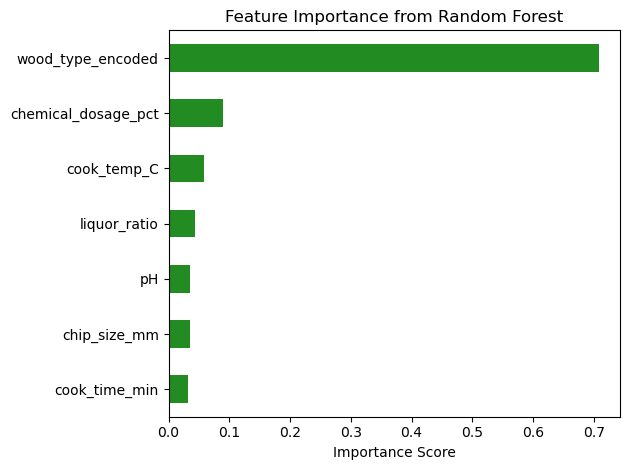

In [84]:
# Visualize feature importance
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(rf_model.feature_importances_, index=features)
importance.sort_values().plot(kind='barh', color='forestgreen')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

**FEATURE IMPORTANCE INSIGHTS**

- `wood_type_encoded` is by far the most influential feature, contributing ~70% of the model’s predictive power. This suggests that fibre yield is highly dependent on the species or type of wood used.
- `chemical_dosage_pct` and `cook_temp_C` follow as secondary drivers, reinforcing the importance of chemical and thermal conditions.
- `liquor_ratio`, `pH`, `chip_size_mm`, and `cook_time_min` have relatively minor influence, but may still contribute in interaction with dominant features.

These insights highlight the need for wood-specific process tuning and careful dosage control to optimize fibre yield.